## Pitching Predictor Project

In [1]:
import csv
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Loading Data 
os.chdir('C:/Users/andre/OneDrive/Documents/UVA SYS ME/Job Interview Resources/pitches_folder_(1)/pitches_folder')
df = pd.DataFrame()
df = pd.read_csv("pitches")
df.info()
pd.set_option("display.max_columns", None)
print(df)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718961 entries, 0 to 718960
Columns: 125 entries, uid to modified_by
dtypes: float64(80), int64(25), object(20)
memory usage: 685.7+ MB
             uid  game_pk  year        date  team_id_b  team_id_p  inning  \
0       14143226   286874  2011  2011-03-31        108        118       1   
1       14143227   286874  2011  2011-03-31        108        118       1   
2       14143228   286874  2011  2011-03-31        108        118       1   
3       14143229   286874  2011  2011-03-31        108        118       1   
4       14143230   286874  2011  2011-03-31        108        118       1   
...          ...      ...   ...         ...        ...        ...     ...   
718956  19838192   317073  2011  2011-10-28        140        138       9   
718957  19838193   317073  2011  2011-10-28        140        138       9   
718958  19838194   317073  2011  2011-10-28        140        138       9   
718959  19838195   317073  2011  2011-10-28 

Counting the number of pitch types in the dataframe.

In [3]:
# Counting all the different types of pitches there are
df = df[df['pitch_type'].notna()] # removing NaNs from pitch_type column
df['pitch_type'].value_counts()

FF    238541
SL    109756
SI     87740
FT     81056
CH     72641
CU     56379
FC     41702
FS     10503
KC      8490
KN      4450
IN      4058
PO       559
FO       329
FA       204
EP       134
SC       120
UN        17
AB         2
Name: pitch_type, dtype: int64

Text(0, 0.5, 'Frequency')

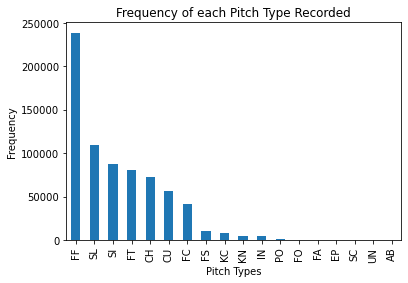

In [4]:
# Visualization of the amount of each pitch type
ax = df['pitch_type'].value_counts().plot(kind='bar',
                                    title="Frequency of each Pitch Type Recorded")
ax.set_xlabel("Pitch Types")
ax.set_ylabel("Frequency")

I will be creating two Logistic Regression models for predicting the probability of fastballs and sliders. The process for building these models will be the same for both and any other pitches I consider doing in the future.

In [5]:
# Creating two dataframes so I can do feature engineering on the dataframe in order to get it set up for the fastball and slider model.
FF = df.copy()
SL = df.copy()

In [6]:
# Setting Fastball indicator as 1 and all other pitch types to zero in order get model ready for training and testing.
FF["pitch_type"].replace({"FF": "1"
                          , "SL": "0"
                          , "SI": "0"
                          , "FT": "0"
                          , "CH": "0"
                          , "CU": "0"
                          , "FC": "0"
                          , "FS": "0"
                          , "KC": "0"
                          , "KN": "0"
                          , "IN": "0"
                          , "PO": "0"
                          , "FO": "0"
                          , "FA": "0"
                          , "EP": "0"
                          , "SC": "0"
                          , "UN": "0"
                          , "AB": "0"}, inplace=True)
# making the pitch type column into numeric in order to do analysis
FF["pitch_type"] = pd.to_numeric(FF["pitch_type"]) 
# confirming total number of fastballs in data frame
FF['pitch_type'].value_counts()[1]

238541

In [7]:
# Setting Slider indicator as 1 and all other pitch types to zero in order get model ready for training and testing.
SL["pitch_type"].replace({"FF": "0"
                          , "SL": "1"
                          , "SI": "0"
                          , "FT": "0"
                          , "CH": "0"
                          , "CU": "0"
                          , "FC": "0"
                          , "FS": "0"
                          , "KC": "0"
                          , "KN": "0"
                          , "IN": "0"
                          , "PO": "0"
                          , "FO": "0"
                          , "FA": "0"
                          , "EP": "0"
                          , "SC": "0"
                          , "UN": "0"
                          , "AB": "0"}, inplace=True)
# making the pitch type column into numeric in order to do analysis
SL["pitch_type"] = pd.to_numeric(SL["pitch_type"])
# confirming total number of sliders in data frame
SL['pitch_type'].value_counts()[1]

109756

### Setting up Fastball Model

In [8]:
# Setting up correlation matrix to see what variables show correlation with the pitch type.
corr_FF = FF.corr()
corr_FF.style.background_gradient(cmap='coolwarm')

C:\Users\andre\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\andre\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [9]:
# Dropping nan columns
FF = FF.drop(['year', 'y0'], axis = 1)
FF = FF.drop(FF.loc[:,'runner1_id':'modified_by'].columns, axis = 1)

In [10]:
# Setting up correlation matrix with remaining variables
corr_FF = FF.corr()
corr_FF.style.background_gradient(cmap='coolwarm')

,uid,game_pk,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,is_final_pitch,final_balls,final_strikes,final_outs,start_tfs,batter_id,pitcher_id,away_team_runs,home_team_runs,pitch_id,pitch_tfs,x,y,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z,px,pz,x0,z0,vx0,vz0,vy0,ax,az,ay,break_length,break_y,break_angle,pitch_type,type_confidence,zone,nasty,spin_dir,spin_rate,on_1b,on_2b,on_3b
uid,1.000000,0.390780,0.019080,0.019230,-0.007139,-0.000892,0.001742,0.002171,-0.012253,-0.005117,0.005940,0.006703,0.001811,-0.000431,-0.010316,0.010756,-0.000249,-0.041532,0.066375,0.027437,0.026047,0.028451,0.003006,-0.040438,-0.010647,-0.009731,0.032115,0.054650,0.033549,0.021399,0.010359,-0.010501,0.011032,0.008976,0.011112,0.017892,-0.005844,-0.009883,-0.032322,0.008789,-0.004819,-0.067526,-0.014105,0.124168,-0.007035,0.014347,0.020910,0.000313,-0.002411,-0.006149,-0.029124,0.065175,0.061079,0.077527
game_pk,0.390780,1.000000,0.071178,0.073782,-0.004490,-0.001576,0.000299,0.000916,-0.016561,-0.002658,0.003369,0.003333,-0.000789,0.000122,-0.002899,0.005459,-0.001402,-0.027894,-0.003258,-0.011546,0.013042,0.022960,0.001331,-0.020530,-0.004231,0.004193,0.021043,0.029973,0.019338,0.011670,0.004256,0.008258,0.006416,-0.000102,0.002959,0.025436,-0.001067,-0.023671,-0.021063,0.004565,0.013524,-0.019262,-0.011245,0.048114,0.000098,0.004832,0.020328,0.003654,-0.001969,-0.004168,0.013427,-0.005285,-0.013664,-0.012314
team_id_b,0.019080,0.071178,1.000000,-0.073066,-0.002456,-0.005154,-0.006554,-0.001440,0.004429,0.003328,-0.004021,-0.007033,0.001415,0.000706,0.007661,-0.008023,0.001317,-0.002767,0.002937,-0.003897,-0.016549,-0.019408,-0.009104,-0.004019,0.007697,0.019807,-0.011282,-0.013044,-0.021110,-0.011309,-0.011228,-0.011585,-0.008223,-0.012683,-0.006118,-0.006460,0.004899,0.004008,0.011329,-0.011317,-0.011578,0.000625,0.016611,-0.008871,0.010295,-0.013564,0.005219,0.003802,-0.000778,0.007052,0.004885,-0.007411,-0.017993,-0.000785
team_id_p,0.019230,0.073782,-0.073066,1.000000,0.003914,0.003741,-0.001520,-0.003043,0.010576,-0.006731,0.005034,-0.006135,0.004695,0.000362,-0.009953,0.014904,0.009067,-0.003658,-0.009212,-0.115061,-0.014822,-0.016573,-0.004432,-0.004009,-0.003205,0.030795,-0.003862,-0.003899,0.007204,0.003799,0.059711,-0.019493,0.003028,-0.025179,0.086777,0.024459,-0.087047,-0.016471,0.003127,0.067020,-0.017629,0.006032,0.014910,0.002568,-0.067054,-0.015156,-0.081324,0.011479,0.002520,-0.032804,0.003599,-0.013273,-0.005855,-0.017172
inning,-0.007139,-0.004490,-0.002456,0.003914,1.000000,0.040169,0.976341,0.001987,0.011561,0.000590,-0.000823,0.012520,0.006771,0.000162,0.002893,0.009145,0.001277,-0.201844,0.007382,0.039526,0.488752,0.478855,0.964648,-0.197081,0.002184,-0.014789,0.060975,0.055342,-0.016973,-0.012171,-0.023553,-0.025919,-0.005013,0.012942,-0.052607,-0.137384,0.048075,0.052252,-0.061138,-0.028223,-0.016758,0.077492,-0.004461,-0.041883,0.034019,0.015466,-0.008850,0.000009,-0.017771,-0.001996,-0.009530,0.022826,0.016400,0.023869
top,-0.000892,-0.001576,-0.005154,0.003741,0.040169,1.000000,-0.051980,-0.002008,-0.003248,-0.006637,0.003657,0.001433,-0.000118,0.000773,-0.012730,0.010341,0.005850,0.011827,0.003876,0.005108,-0.038259,-0.015593,-0.050919,0.011635,0.001073,-0.006033,0.007507,0.007583,0.018257,-0.001194,-0.002222,0.006518,-0.001935,0.006758,-0.010203,0.003359,0.007537,-0.003004,-0.007689,-0.002782,0.007082,0.004551,-0.007634,-0.000762,0.005419,0.009027,0.011183,-0.004409,0.000639,-0.003261,0.002892,0.015284,0.016719,0.013940
at_bat_num,0.001742,0.000299,-0.006554,-0.001520,0.976341,-0.051980,1.000000,0.002824,-0.010417,0.002917,-0.001847,0.012091,0.055724,-0.000296,0.006964,0.007473,0.042191,-0.202907,0.006802,0.041579,0.582259,0.569420,0.995346,-0.197378,0.001569,-0.014862,0.061263,0.055790,-0.016469,-0.009573,-0.021485,-0.025768,-0.004309,0.012882,-0.051102,-0.140359,0.046556,0.053018,-0.061357,-0.026102,-0.016473,0.076771,-0.004803,-0.041053,0.031633,0.015863,-0.015331

In [11]:
# Sorting correlation values to pitch_type in order to determine which are the best indicators for predicting when a Fastball is thrown.
corr_FF['pitch_type'].sort_values()

break_length      -0.601570
vy0               -0.507116
vz0               -0.332165
y                 -0.213460
break_y           -0.195955
zone              -0.107303
pfx_x             -0.089909
ax                -0.088784
pcount_pitcher    -0.063531
strikes           -0.047665
final_outs        -0.025064
outs              -0.024273
is_final_pitch    -0.021503
px                -0.019798
fouls             -0.015306
team_id_p         -0.015156
team_id_b         -0.013564
z0                -0.003835
pcount_at_bat     -0.003167
x0                -0.002517
final_strikes     -0.002037
sz_bot             0.000016
type_confidence    0.000174
sz_top             0.000989
pitch_tfs          0.002499
batter_id          0.003063
start_tfs          0.003388
game_pk            0.004832
top                0.009027
on_2b              0.009955
on_3b              0.010135
on_1b              0.012133
home_team_runs     0.012540
uid                0.014347
inning             0.015466
at_bat_num         0

Using the boxplot charts below we see that variable az and pfx_z does contribute information towards indicating if a pitch is a fastball (FF) or not as it helps identify the types of pitches that are FF since this vairable is positively correlated with it.

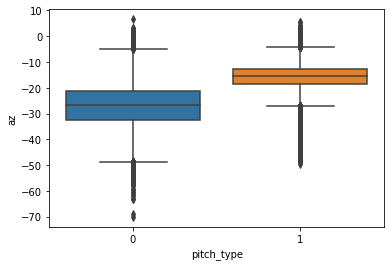

In [12]:
az = sns.boxplot(x = FF['pitch_type'],
           y = FF['az'])

<AxesSubplot:xlabel='pitch_type', ylabel='pfx_z'>

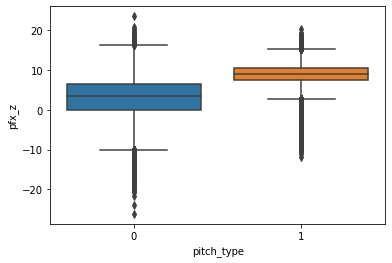

In [13]:
sns.boxplot(x = FF['pitch_type'],
           y = FF['pfx_z'])

The Boxplots below show that variable break_length and vy0 does contribute information towards indicating if a pitch is a fastball (FF) or not as it helps identify the types of pitches that are not FF since this vairable is negatively correlated with it.

<AxesSubplot:xlabel='pitch_type', ylabel='break_length'>

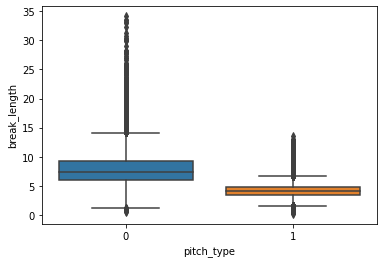

In [14]:
sns.boxplot(x = FF['pitch_type'],
           y = FF['break_length'])

<AxesSubplot:xlabel='pitch_type', ylabel='vy0'>

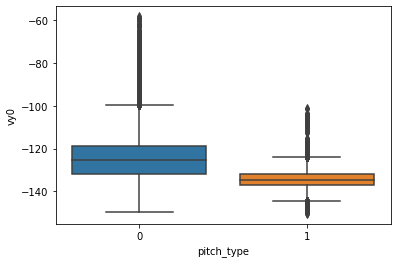

In [15]:
sns.boxplot(x = FF['pitch_type'],
           y = FF['vy0'])

The boxplot below shows that variable sz_bot does not contribute any information towards indicating if a pitch is a fastball or not.

<AxesSubplot:xlabel='pitch_type', ylabel='sz_bot'>

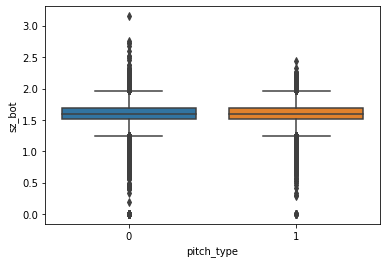

In [16]:
sns.boxplot(x = FF['pitch_type'],
           y = FF['sz_bot'])

The Variables chosen to develop my FF pitch model based on the correlation matrix and boxplots will be the following:

break_length 

vy0

vz0

y

break_y

zone

spin_dir

break_angle

pz

spin_rate

ay

end_speed

start_speed

pfx_z

az

In [17]:
# Extracting the selected columns from the dataframe
col_list = ['break_length',
            'vy0',
            'vz0',
            'y',
            'break_y',
            'zone',
            'spin_dir',
            'break_angle',
            'pz',
            'spin_rate',
            'ay',
            'end_speed',
            'start_speed',
            'pfx_z',
            'az',
            'pitch_type']
FF = FF[col_list]
print(FF)

        break_length      vy0     vz0       y  break_y  zone  spin_dir  \
26               2.8 -127.336  -9.248  163.19     23.9   8.0   183.148   
27               1.9 -132.458  -8.133  142.47     23.8  12.0   187.663   
28               2.3 -131.189 -10.574  171.83     23.9  14.0   179.643   
29               2.1 -132.437  -7.546  138.15     23.8   3.0   184.623   
30               0.7 -135.449 -10.658  155.42     23.8   6.0   182.338   
...              ...      ...     ...     ...      ...   ...       ...   
718956           2.6 -143.374  -6.112  140.74     23.7   2.0   197.537   
718957           6.1 -133.947  -5.564  170.10     23.8   9.0   164.636   
718958           3.4 -142.543  -7.265  155.42     23.7   4.0   204.835   
718959           7.2 -136.340  -4.042  158.01     23.8   8.0   253.646   
718960           3.5 -142.847  -3.044  129.52     23.7   1.0   207.372   

        break_angle     pz  spin_rate      ay  end_speed  start_speed  pfx_z  \
26             -0.7  1.746   25

In [18]:
# Preparing the data for model
feature_cols = ['break_length',
            'vy0',
            'vz0',
            'y',
            'break_y',
            'zone',
            'spin_dir',
            'break_angle',
            'pz',
            'spin_rate',
            'ay',
            'end_speed',
            'start_speed',
            'pfx_z',
            'az']
X = FF[feature_cols] # Features
y = FF.pitch_type # Target Variable

In [19]:
# Splitting the data into Training and Testing having 75% of the data to be used for training the rest for testing 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [20]:
# Initializing Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
# Fitting the model with the data
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Making Predictions on test set
y_pred=logreg.predict(X_test)
# Predicting Probabilities on test set
Fastpred = logreg.predict_proba(X_test)
print(Fastpred)

[[9.99999999e-01 9.13516655e-10]
 [8.84569102e-01 1.15430898e-01]
 [9.99229194e-01 7.70805944e-04]
 ...
 [9.25730456e-03 9.90742695e-01]
 [5.58641088e-01 4.41358912e-01]
 [3.25884895e-02 9.67411510e-01]]


In [22]:
# Building Confusion Matrix based on results
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[108404,  11017],
       [ 10176,  49574]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

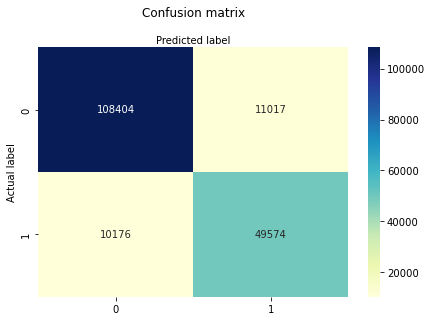

In [23]:
# Formatting Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
# Printing Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8817163491859732
Precision: 0.818174316317605
Recall: 0.8296903765690377


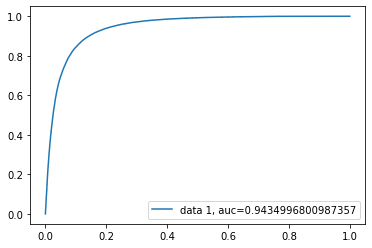

In [25]:
# Creating the ROC Curve and getting the AUC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Setting up Slider Model

In [26]:
# Cleaning Slider data
SL = SL.drop(['year', 'y0'], axis = 1)
SL = SL.drop(SL.loc[:,'runner1_id':'modified_by'].columns, axis = 1)

In [27]:
# Setting up correlation matrix to see what variables show correlation with the pitch type.
corr_SL = SL.corr()
corr_SL.style.background_gradient(cmap='coolwarm')

,uid,game_pk,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,is_final_pitch,final_balls,final_strikes,final_outs,start_tfs,batter_id,pitcher_id,away_team_runs,home_team_runs,pitch_id,pitch_tfs,x,y,start_speed,end_speed,sz_top,sz_bot,pfx_x,pfx_z,px,pz,x0,z0,vx0,vz0,vy0,ax,az,ay,break_length,break_y,break_angle,pitch_type,type_confidence,zone,nasty,spin_dir,spin_rate,on_1b,on_2b,on_3b
uid,1.000000,0.390780,0.019080,0.019230,-0.007139,-0.000892,0.001742,0.002171,-0.012253,-0.005117,0.005940,0.006703,0.001811,-0.000431,-0.010316,0.010756,-0.000249,-0.041532,0.066375,0.027437,0.026047,0.028451,0.003006,-0.040438,-0.010647,-0.009731,0.032115,0.054650,0.033549,0.021399,0.010359,-0.010501,0.011032,0.008976,0.011112,0.017892,-0.005844,-0.009883,-0.032322,0.008789,-0.004819,-0.067526,-0.014105,0.124168,-0.007035,0.003359,0.020910,0.000313,-0.002411,-0.006149,-0.029124,0.065175,0.061079,0.077527
game_pk,0.390780,1.000000,0.071178,0.073782,-0.004490,-0.001576,0.000299,0.000916,-0.016561,-0.002658,0.003369,0.003333,-0.000789,0.000122,-0.002899,0.005459,-0.001402,-0.027894,-0.003258,-0.011546,0.013042,0.022960,0.001331,-0.020530,-0.004231,0.004193,0.021043,0.029973,0.019338,0.011670,0.004256,0.008258,0.006416,-0.000102,0.002959,0.025436,-0.001067,-0.023671,-0.021063,0.004565,0.013524,-0.019262,-0.011245,0.048114,0.000098,-0.005580,0.020328,0.003654,-0.001969,-0.004168,0.013427,-0.005285,-0.013664,-0.012314
team_id_b,0.019080,0.071178,1.000000,-0.073066,-0.002456,-0.005154,-0.006554,-0.001440,0.004429,0.003328,-0.004021,-0.007033,0.001415,0.000706,0.007661,-0.008023,0.001317,-0.002767,0.002937,-0.003897,-0.016549,-0.019408,-0.009104,-0.004019,0.007697,0.019807,-0.011282,-0.013044,-0.021110,-0.011309,-0.011228,-0.011585,-0.008223,-0.012683,-0.006118,-0.006460,0.004899,0.004008,0.011329,-0.011317,-0.011578,0.000625,0.016611,-0.008871,0.010295,-0.007499,0.005219,0.003802,-0.000778,0.007052,0.004885,-0.007411,-0.017993,-0.000785
team_id_p,0.019230,0.073782,-0.073066,1.000000,0.003914,0.003741,-0.001520,-0.003043,0.010576,-0.006731,0.005034,-0.006135,0.004695,0.000362,-0.009953,0.014904,0.009067,-0.003658,-0.009212,-0.115061,-0.014822,-0.016573,-0.004432,-0.004009,-0.003205,0.030795,-0.003862,-0.003899,0.007204,0.003799,0.059711,-0.019493,0.003028,-0.025179,0.086777,0.024459,-0.087047,-0.016471,0.003127,0.067020,-0.017629,0.006032,0.014910,0.002568,-0.067054,-0.008639,-0.081324,0.011479,0.002520,-0.032804,0.003599,-0.013273,-0.005855,-0.017172
inning,-0.007139,-0.004490,-0.002456,0.003914,1.000000,0.040169,0.976341,0.001987,0.011561,0.000590,-0.000823,0.012520,0.006771,0.000162,0.002893,0.009145,0.001277,-0.201844,0.007382,0.039526,0.488752,0.478855,0.964648,-0.197081,0.002184,-0.014789,0.060975,0.055342,-0.016973,-0.012171,-0.023553,-0.025919,-0.005013,0.012942,-0.052607,-0.137384,0.048075,0.052252,-0.061138,-0.028223,-0.016758,0.077492,-0.004461,-0.041883,0.034019,0.065466,-0.008850,0.000009,-0.017771,-0.001996,-0.009530,0.022826,0.016400,0.023869
top,-0.000892,-0.001576,-0.005154,0.003741,0.040169,1.000000,-0.051980,-0.002008,-0.003248,-0.006637,0.003657,0.001433,-0.000118,0.000773,-0.012730,0.010341,0.005850,0.011827,0.003876,0.005108,-0.038259,-0.015593,-0.050919,0.011635,0.001073,-0.006033,0.007507,0.007583,0.018257,-0.001194,-0.002222,0.006518,-0.001935,0.006758,-0.010203,0.003359,0.007537,-0.003004,-0.007689,-0.002782,0.007082,0.004551,-0.007634,-0.000762,0.005419,0.000610,0.011183,-0.004409,0.000639,-0.003261,0.002892,0.015284,0.016719,0.013940
at_bat_num,0.001742,0.000299,-0.006554,-0.001520,0.976341,-0.051980,1.000000,0.002824,-0.010417,0.002917,-0.001847,0.012091,0.055724,-0.000296,0.006964,0.007473,0.042191,-0.202907,0.006802,0.041579,0.582259,0.569420,0.995346,-0.197378,0.001569,-0.014862,0.061263,0.055790,-0.016469,-0.009573,-0.021485,-0.025768,-0.004309,0.012882,-0.051102,-0.140359,0.046556,0.053018,-0.061357,-0.026102,-0.016473,0.076771,-0.004803,-0.041053,0.031633,0.068363,-0.01533

In [28]:
# Sorting correlation values to pitch_type in order to determine which are the best indicators for predicting when a Slider is thrown.
corr_SL['pitch_type'].sort_values()

spin_rate         -0.575832
az                -0.345496
pfx_z             -0.308124
ay                -0.299677
start_speed       -0.275061
end_speed         -0.241479
spin_dir          -0.234409
break_angle       -0.178478
pz                -0.148398
x                 -0.093780
nasty             -0.068472
x0                -0.034679
final_balls       -0.029389
balls             -0.023004
pcount_pitcher    -0.021755
start_tfs         -0.021115
pitch_tfs         -0.020987
vx0               -0.011472
team_id_p         -0.008639
z0                -0.008424
sz_top            -0.007842
team_id_b         -0.007499
game_pk           -0.005580
sz_bot            -0.005196
top                0.000610
on_2b              0.000614
batter_id          0.002103
uid                0.003359
on_1b              0.004119
pitcher_id         0.010732
is_final_pitch     0.013296
on_3b              0.014004
outs               0.027245
final_outs         0.036889
home_team_runs     0.038607
away_team_runs     0

Using the boxplot charts below we see that variable vy0 and break_length does contribute information towards indicating if a pitch is a slider (SL) or not as it helps identify the types of pitches that are SL since this vairable is positively correlated with it.

<AxesSubplot:xlabel='pitch_type', ylabel='vy0'>

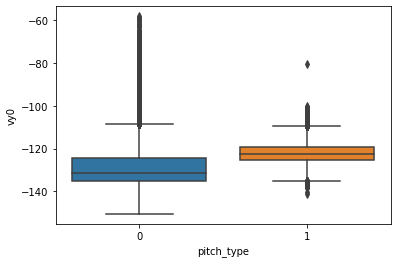

In [29]:
sns.boxplot(x = SL['pitch_type'],
           y = SL['vy0'])

<AxesSubplot:xlabel='pitch_type', ylabel='break_length'>

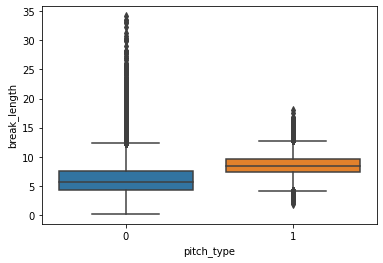

In [30]:
sns.boxplot(x = SL['pitch_type'],
           y = SL['break_length'])

The Boxplots below show that variable spin_rate and az does contribute information towards indicating if a pitch is a slider (SL) or not as it helps identify the types of pitches that are not SL since this vairable is negatively correlated with it.

<AxesSubplot:xlabel='pitch_type', ylabel='spin_rate'>

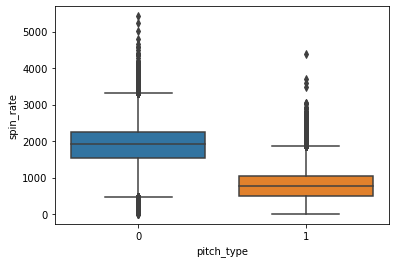

In [31]:
sns.boxplot(x = SL['pitch_type'],
           y = SL['spin_rate'])

<AxesSubplot:xlabel='pitch_type', ylabel='az'>

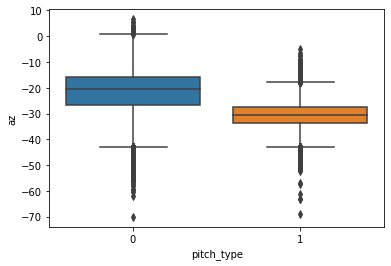

In [32]:
sns.boxplot(x = SL['pitch_type'],
           y = SL['az'])

The boxplot below shows that variable top does not contribute any information towards indicating if a pitch is a slider or not.

<AxesSubplot:xlabel='pitch_type', ylabel='top'>

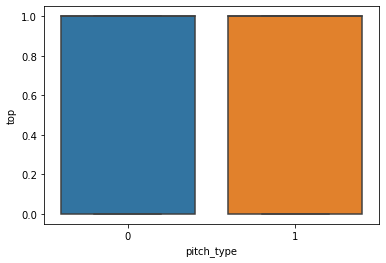

In [33]:
sns.boxplot(x = SL['pitch_type'],
           y = SL['top'])

The Variables chosen to develop my slider pitch model will be the following:

spin_rate

az   

pfx_z  

ay       

start_speed  

end_speed    

spin_dir   

break_angle  

pz     

x           

px    

strikes  

y        

vz0     

pfx_x      

ax  

break_y  

break_length   

vy0                

In [34]:
# Extracting the selected columns from the dataframe
col_list = ['spin_rate',
            'az',
            'pfx_z',
            'ay',
            'start_speed',
            'end_speed',
            'spin_dir',
            'break_angle',
            'pz',
            'x',
            'px',
            'strikes',
            'y',
            'vz0',
            'pfx_x',
            'ax',
            'break_y',
            'break_length',
            'vy0',
            'pitch_type']
SL = SL[col_list]
print(SL)

        spin_rate      az  pfx_z      ay  start_speed  end_speed  spin_dir  \
26       2519.455 -10.094  13.21  22.579         87.2       81.4   183.148   
27       2838.803  -6.487  14.34  26.928         90.9       84.0   187.663   
28       2701.919  -7.742  13.82  24.831         90.0       83.8   179.643   
29       2683.280  -7.759  13.60  26.271         90.7       84.0   184.623   
30       3352.205  -0.903  16.68  27.663         92.9       85.9   182.338   
...           ...     ...    ...     ...          ...        ...       ...   
718956   2312.186 -10.386  10.56  36.837         97.9       89.1   197.537   
718957    697.763 -25.962   3.39  29.860         91.4       84.3   164.636   
718958   2162.620 -12.891   9.53  38.935         97.3       88.0   204.835   
718959   2180.650 -26.404   3.05  32.209         93.1       85.3   253.646   
718960   1996.857 -14.714   8.56  38.276         97.4       88.3   207.372   

        break_angle     pz       x     px  strikes       y     

In [35]:
# Preparing the data for model
feature_cols = ['spin_rate',
            'az',
            'pfx_z',
            'ay',
            'start_speed',
            'end_speed',
            'spin_dir',
            'break_angle',
            'pz',
            'x',
            'px',
            'strikes',
            'y',
            'vz0',
            'pfx_x',
            'ax',
            'break_y',
            'break_length',
            'vy0']
Xsl = SL[feature_cols] # Features
ysl = SL.pitch_type # Target Variable

In [36]:
# Splitting the data into Training and Testing having 75% of the data to be used for training the rest for testing 
X_train,X_test,y_train,y_test=train_test_split(Xsl,ysl,test_size=0.25,random_state=0)

In [37]:
# Initializing Logistic Regression Model
logreg = LogisticRegression(max_iter=5000)
# Fitting the model with the data
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [38]:
# Making Predictions on test set
y_pred=logreg.predict(X_test)
# Predicting Probabilities on test set
Slidpred = logreg.predict_proba(X_test)
print(Slidpred)

[[9.97527854e-01 2.47214635e-03]
 [9.99999910e-01 9.03727746e-08]
 [9.74175468e-01 2.58245320e-02]
 ...
 [9.99883553e-01 1.16447071e-04]
 [9.99920389e-01 7.96108879e-05]
 [9.90219884e-01 9.78011618e-03]]


In [39]:
# Building Confusion Matrix based on results
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[144367,   7326],
       [  8018,  19460]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

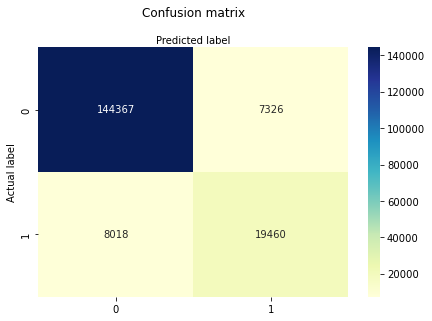

In [40]:
# Formating Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
# Printing Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.914361141032868
Precision: 0.7264989173448817
Recall: 0.7082029259771454


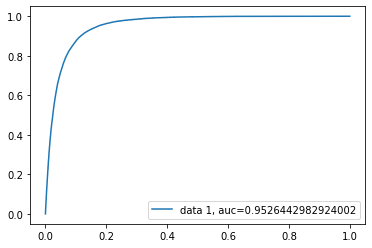

In [42]:
# Creating the ROC Curve and getting the AUC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Future Work

The future steps I would take with this project would be implement 10-fold cross validation to reduce the bias in the predictions, do some more investigation into wheter scaling the data beforehand would help in the models performance, and use other models such as KNN, Penalized Logistic Regression, Naïve Bayes, Random Forest, Boosted Trees, LDA, QDA, and SVM to see which model is best at predicting the probability of a given pitch. Another future step would be to see if any other information can be extracted from the dataframe and getting a better understanding at what the data is telling us. Also, with exploring new models I would also look at the tuning parameters for each of them and find the best ones to use in order to optimize the performance of the model. In order to measure the success of these models I would use metrics such as accuracy, AUROC, TPR, FPR, and Precision and use all these metrics to make a decision on which one works best. With the logistic regression model performance in I am optimistic that in implementing these steps the perfomance of these models can be improved.